## Generate masks for images

In [10]:
import os
import random

from PIL import Image, ImageDraw, ImageFont
import numpy as np
import matplotlib.pyplot as plt

import dotenv
dotenv.load_dotenv(dotenv.find_dotenv());

In [14]:
COLORS = [
    (255, 0, 255),
    (0, 255, 0),
    (0, 0, 255),
    (0, 255, 255),
    (255, 255, 0),
    (255, 0, 0),
    (255, 255, 255)
]

## Mask with text

We pick random LOREM IPSUM text and we write it using diferent colors and diferent positions over the image as a corruption mask.

In [20]:
_LOREM_IPSUM = 'Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.'

Pick randomom words from lorem ipsum

In [21]:
def pick_random_words(n_word=5, text=_LOREM_IPSUM):
    splited_lorem = text.split()
    idx = np.random.randint(0, len(splited_lorem), n_word)
    return ' '.join([splited_lorem[i] for i in idx])

Write the picked random text to random positions using random colors

In [22]:
def write_random(img):
    fnt_size = int(img.size[0] * .1)
    fnt = ImageFont.truetype(os.environ['FONT'], fnt_size)
    d = ImageDraw.Draw(img)

    curr_pos = 5
    while curr_pos < img.size[1]:
        if np.random.random() > .15:
            d.text((10, curr_pos), pick_random_words(), font=fnt, fill=random.choice(COLORS))
        curr_pos += int(fnt_size * 1.1)

In [23]:
def generate_text_mask(original_arr):
    masked = original_arr.copy()
    mask = Image.fromarray(np.uint8(masked * 255))
    write_random(mask)
    return np.asarray(mask) / 255.

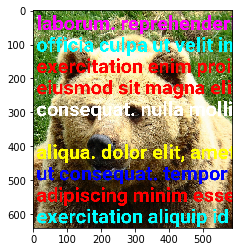

In [24]:
original = Image.open('../data/raw/0/000000000285.jpg')
masked = generate_text_mask(np.asarray(original) / 255.)
plt.imshow(masked)

## Mask droping pixels

Generate simple corruption mask droping a random rate of pixels

In [25]:
def drop_pixels(original):
    rate = np.random.choice(np.arange(.1, .5, .1))
    random_mask = np.random.random(size=(original.shape[:-1]))
    random_idx = random_mask <= rate
    
    masked = original.copy()
    masked[random_idx] = np.array(random.choice(COLORS)) / 255.
    
    return masked

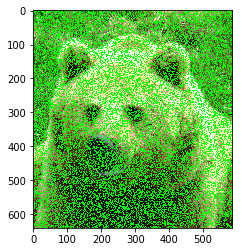

In [33]:
img = drop_pixels(np.asarray(original) / 255.)
plt.imshow(img)

## Mask with vertical and horizontal lines

We create a corruption mask by drawing a random number of vertical and horizontal lines, each line with a different color and a different width

In [53]:
def generate_lines_mask(original_arr, min_width=7, max_width=14):
    n_vertical_lines = np.random.randint(5, 11)
    n_horizontal_lines = np.random.randint(5, 11)
    
    hozizontal_lines_pos = np.random.randint(0, original_arr.shape[0], size=n_horizontal_lines)    
    hozizontal_lines_len = np.random.randint(original_arr.shape[0] // 1.5, original_arr.shape[0], size=(n_horizontal_lines))
    horizontal_lines_colors = [ random.choice(COLORS) for _ in range(n_horizontal_lines)]
    horizontal_lines_width = np.random.randint(min_width - 1, max_width + 1, size=n_horizontal_lines)
    
    vertical_lines_pos = np.random.randint(0, original_arr.shape[1], size=(n_vertical_lines))    
    vertical_lines_len = np.random.randint(original_arr.shape[1] // 1.5, original_arr.shape[1], size=(n_vertical_lines))
    vertical_lines_colors = [ random.choice(COLORS) for _ in range(n_vertical_lines)]
    vertical_lines_width = np.random.randint(min_width - 1, max_width + 1, size=n_vertical_lines)

    masked = original_arr.copy()
    mask = Image.fromarray(np.uint8(masked * 255))
    
    color = random.choice(COLORS)
    d = ImageDraw.Draw(mask)
    for i in range(n_horizontal_lines):
        d.line((hozizontal_lines_pos[i], 
                hozizontal_lines_pos[i], 
                hozizontal_lines_pos[i] + hozizontal_lines_len[i], 
                hozizontal_lines_pos[i]), 
               fill=horizontal_lines_colors[i], width=horizontal_lines_width[i])
    
    for i in range(n_vertical_lines):
        d.line((vertical_lines_pos[i], 
                vertical_lines_pos[i], 
                vertical_lines_pos[i], 
                vertical_lines_pos[i] + vertical_lines_len[i]), 
               fill=vertical_lines_colors[i], width=vertical_lines_width[i])
    return np.asarray(mask) / 255.

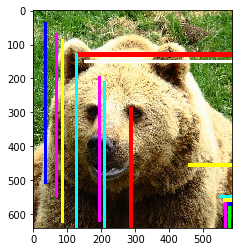

In [59]:
img = generate_lines_mask(np.asarray(original) / 255.)
plt.imshow(img)